In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropMax2Fail0.1


Current folders are:
PlannerPropMax2Fail0.1.0
PlannerPropMax2Fail0.1.1
PlannerPropMax2Fail0.1.2
PlannerPropMax2Fail0.1.3


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
names=["inv goods bought", "inv goods inventories", "grossInvQ", "grossInvQ*price","grossInvExpected (value)"]

In [4]:
os.chdir("../"+folder+".0")
#planner info database from rank==0
plannerInfo=pd.read_csv('plannerInfo.csv', header=None)
#print(plannerInfo)
#planner info database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    plannerInfo=plannerInfo.add(pd.read_csv('plannerInfo.csv', header=None))
plannerInfo.columns=names
#pd.DataFrame(plannerInfo)

In [5]:
plannerInfo

,inv goods bought,inv goods inventories,grossInvQ,grossInvQ*price,grossInvExpected (value)
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000e+00
4,5887.953459,6645.627778,0.000000,0.000000,0.000000e+00
5,4349.084989,5068.618763,0.000000,0.000000,2.796885e+05
6,9486.921241,10965.964330,383.908511,4349.084989,5.042043e+05
7,5938.130517,6864.195866,837.442776,9486.921241,7.668049e+05
8,14911.011147,16997.918128,524.178959,5938.130517,1.016434e+06
9,11271.795885,13045.690314,1316.245623,14911.011147,1.248473e+06


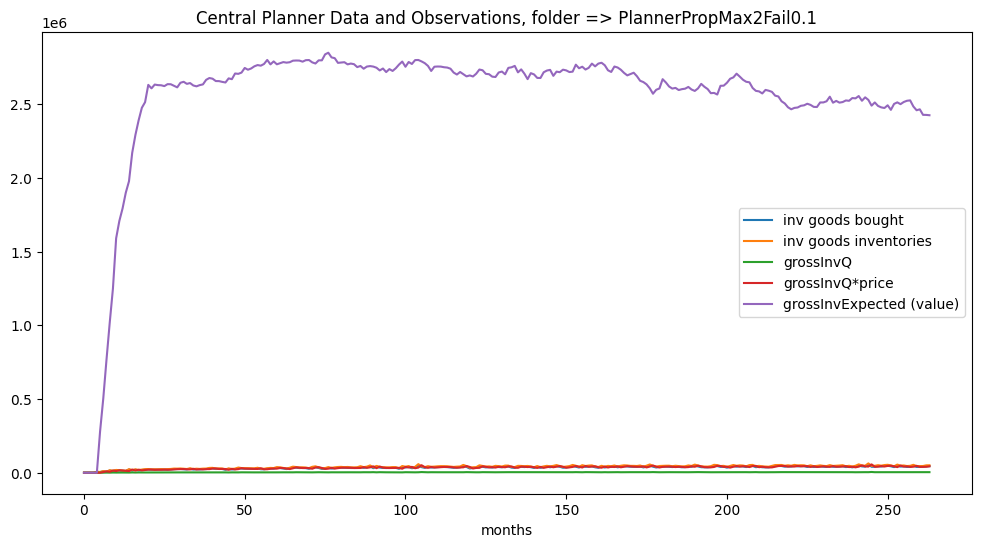

In [6]:
fig=plannerInfo.plot(figsize=(12,6), title="Central Planner Data and Observations, folder => " + folder,\
                     xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlot.jpg",dpi=180)


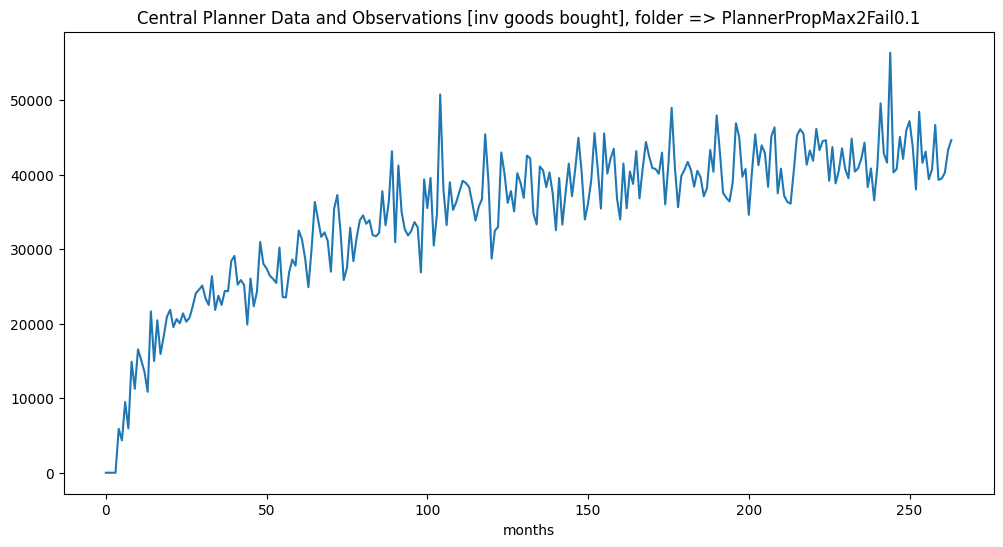

In [7]:
fig=plannerInfo["inv goods bought"].plot(figsize=(12,6), \
        title="Central Planner Data and Observations [inv goods bought], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)

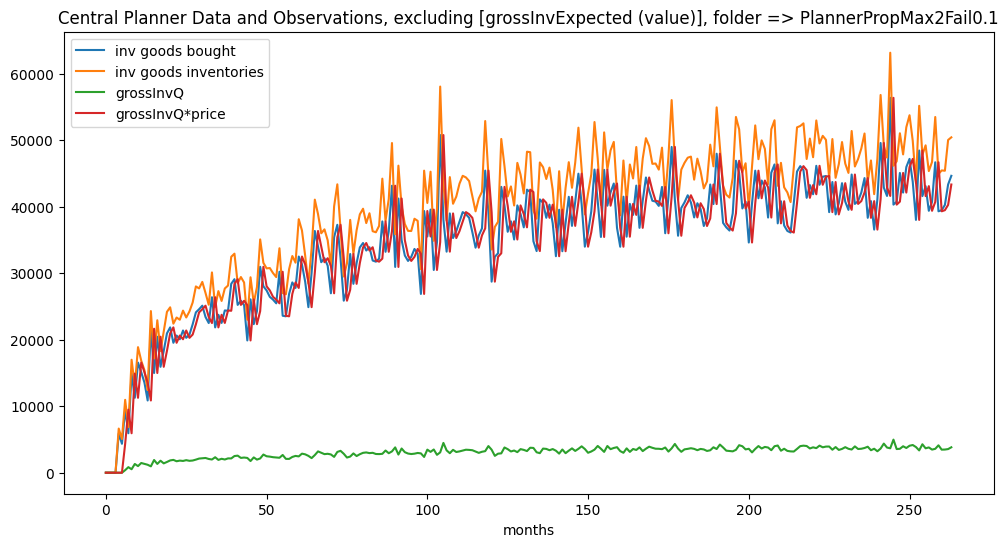

In [8]:
fig=plannerInfo[["inv goods bought", "inv goods inventories", "grossInvQ", "grossInvQ*price"]].plot(figsize=(12,6), \
        title="Central Planner Data and Observations, excluding [grossInvExpected (value)], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)